/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


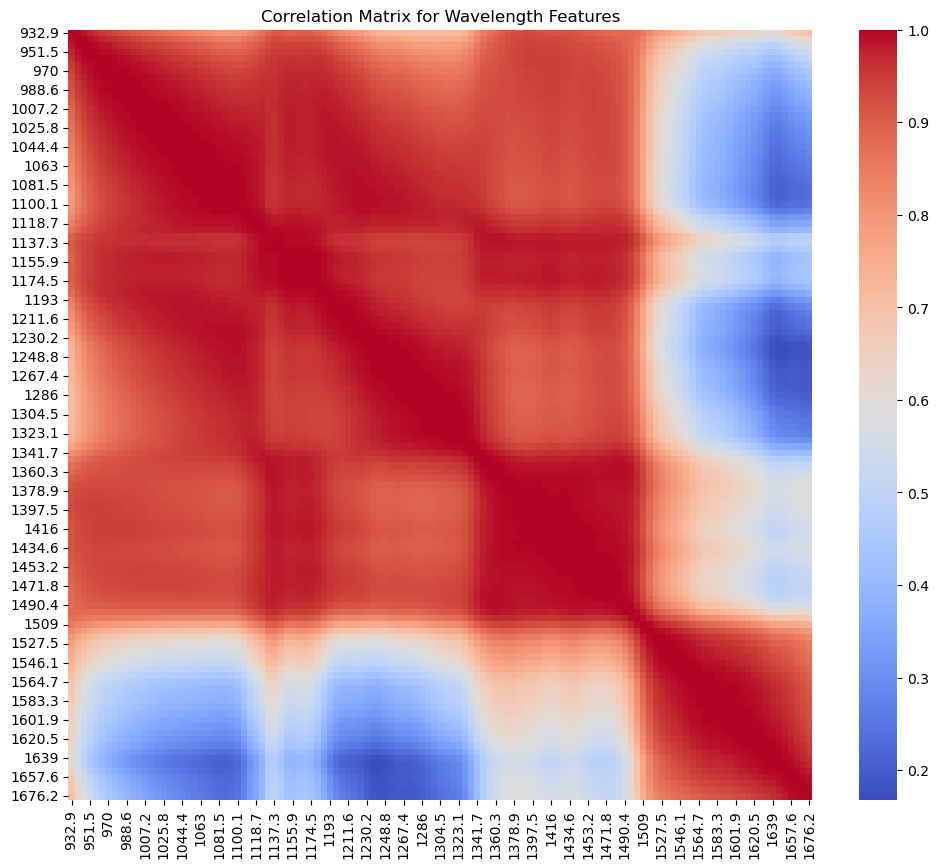

Number of features before removing highly correlated features: 175
Number of features after removing highly correlated features: 80
Highly correlated features:
957.7 and 963.8: 0.9992237318434654
963.8 and 970: 0.9994257375286089
970 and 976.2: 0.9995632724166343
976.2 and 982.4: 0.999655318219879
982.4 and 988.6: 0.9997231817435572
988.6 and 994.8: 0.9997552605709509
988.6 and 1001: 0.999043205552688
994.8 and 1001: 0.9997596691924364
994.8 and 1007.2: 0.9990909305085924
1001 and 1007.2: 0.9997797780602713
1001 and 1013.4: 0.9991364863158605
1007.2 and 1013.4: 0.9997836260966732
1007.2 and 1019.6: 0.9991887574747876
1013.4 and 1019.6: 0.9998054216543066
1013.4 and 1025.8: 0.999288433949433
1019.6 and 1025.8: 0.9998326817967871
1019.6 and 1032: 0.9993666715556865
1025.8 and 1032: 0.9998461751036485
1025.8 and 1038.2: 0.9994157658582117
1032 and 1038.2: 0.9998584564051585
1032 and 1044.4: 0.9994602711441726
1038.2 and 1044.4: 0.999868839672761
1038.2 and 1050.6: 0.9994632422532832
1044.

/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+04, tolerance: 2.415e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.663e+04, tolerance: 2.401e+01 Linear regression models with null weight for the l1 regularization term are more efficientl

Best accuracy: -20.544362862587427
Best parameters: {'polynomial__degree': 2, 'regression__alpha': 0.001, 'regression__l1_ratio': 0.2222222222222222}
Training MSE: 12.441777156570671


/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.860e+03, tolerance: 2.415e+01
  model = cd_fast.enet_coordinate_descent(
/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.853e+03, tolerance: 2.401e+01
  model = cd_fast.enet_coordinate_descent(
/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

CV MSE: 20.544362862587427
Submission file saved successfully.


/Users/maelysclerget/anaconda3/envs/MLCourse/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.412e+03, tolerance: 2.379e+01
  model = cd_fast.enet_coordinate_descent(


In [34]:

# def knn():
# PURITY log transform  
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

def preprocessing_v1(apply_one_hot=False, apply_scaling=False, apply_pca=False, apply_correlation=False, apply_remove_outliers=False):
    train_data_og = pd.read_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/train.csv')
    test_data_og = pd.read_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/test.csv')
    train_data = train_data_og.copy()
    test_data = test_data_og.copy()
    train_data = train_data.drop(columns=['prod_substance'])
    test_data = test_data.drop(columns=['prod_substance'])
    
    non_wavelength_cols = ['device_serial', 'substance_form_display', 'measure_type_display']
    wavelength_cols = train_data.columns[6:]
    
    if apply_one_hot:
        # One Hot encoding 
        encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')
        X_train_encoded = encoder.fit_transform(train_data[non_wavelength_cols])
        X_test_encoded = encoder.transform(test_data[non_wavelength_cols])
        
        # Convert encoded features to DataFrame
        X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(non_wavelength_cols))
        X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(non_wavelength_cols))
        
        train_data_combined = pd.concat([pd.DataFrame(X_train_encoded_df), train_data[wavelength_cols].reset_index(drop=True)], axis=1)
        test_data_combined = pd.concat([pd.DataFrame(X_test_encoded_df), test_data[wavelength_cols].reset_index(drop=True)], axis=1)
    else:
        train_data_combined = train_data
        test_data_combined = test_data
    
    # Add sample_name column back to the combined DataFrames
    train_data_combined.insert(0, 'sample_name', train_data_og['sample_name'])
    test_data_combined.insert(0, 'sample_name', test_data_og['sample_name'])
    
    # Remove NaN values
    train_data_combined = train_data_combined.dropna()
    test_data_combined = test_data_combined.dropna()
    
    y_train = train_data['PURITY'].iloc[train_data_combined.index]
    
    #NOTE: toujours mettre scaling avec remove_outliers
    
    if apply_scaling:
        # Standardize the data
        scaler = StandardScaler()
        wavelength_train_scaled = scaler.fit_transform(train_data_combined[wavelength_cols])
        wavelength_test_scaled = scaler.transform(test_data_combined[wavelength_cols])
        
        train_data_combined[wavelength_cols] = wavelength_train_scaled
        test_data_combined[wavelength_cols] = wavelength_test_scaled
    
    if apply_scaling and apply_remove_outliers:
        # Remove outliers
        outliers_index = (np.abs(wavelength_train_scaled) > 3).any(axis=1)
        train_data_combined = train_data_combined[~outliers_index]
        y_train = y_train[~outliers_index]
        
        train_data_combined = train_data_combined.reset_index(drop=True)
        test_data_combined = test_data_combined.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        
    if apply_pca:
        # Perform PCA on scaled wavelength columns
        pca = PCA(n_components=5)
        wavelength_cols = train_data_combined.columns[54:]
        
        X_train_pca = pca.fit_transform(train_data_combined[wavelength_cols])
        X_test_pca = pca.transform(test_data_combined[wavelength_cols])

        # Combine PCA components with original data
        X_train_combined = pd.concat([train_data_combined.iloc[:, :54].reset_index(drop=True), 
                                      pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(5)])], axis=1)
        X_test_combined = pd.concat([test_data_combined.iloc[:, :54].reset_index(drop=True), 
                                     pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(5)])], axis=1)
        
        train_data_combined = X_train_combined
        test_data_combined = X_test_combined
        
    if apply_correlation:
    # Compute correlation matrix only for wavelength columns
        wavelength_cols = train_data_combined.columns[54:] 
        correlation_matrix = train_data_combined[wavelength_cols].corr()

        # Visualize correlation matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
        plt.title("Correlation Matrix for Wavelength Features")
        plt.show()

        # Identify highly correlated features (e.g., |r| > 0.999)
        threshold_high = 0.999
        threshold_low = 0.2

        print(f"Number of features before removing highly correlated features: {train_data_combined.shape[1]}")
        
        high_corr_pairs = [
            (i, j)
            for i in range(correlation_matrix.shape[0])
            for j in range(i + 1, correlation_matrix.shape[1])
            if abs(correlation_matrix.iloc[i, j]) > threshold_high
        ]
        
        features_to_drop = set()
        for i, j in high_corr_pairs:
            features_to_drop.add(wavelength_cols[j])  # Arbitrarily drop the second feature in the pair

        # Remove the selected features
        train_data_combined = train_data_combined.drop(columns=list(features_to_drop))
        test_data_combined = test_data_combined.drop(columns=list(features_to_drop))
        
        print(f"Number of features after removing highly correlated features: {train_data_combined.shape[1]}")
        
        low_corr_pairs = [
            (i, j)
            for i in range(correlation_matrix.shape[0])
            for j in range(i + 1, correlation_matrix.shape[1])
            if abs(correlation_matrix.iloc[i, j]) < threshold_low
        ]

        print("Highly correlated features:")
        for i, j in high_corr_pairs:
            print(f"{wavelength_cols[i]} and {wavelength_cols[j]}: {correlation_matrix.iloc[i, j]}")
        print("Low correlated features:")
        for i, j in low_corr_pairs:
            print(f"{wavelength_cols[i]} and {wavelength_cols[j]}: {correlation_matrix.iloc[i, j]}")
    
    
    return train_data_combined, test_data_combined, y_train

def plot_response_variable(apply_y_transformation=False):
    
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_scaling=True, apply_remove_outliers=True)

    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
        
    plt.figure(figsize=(10, 6))
    sns.histplot(y_train, kde=True)
    plt.title('Distribution of Response Variable (PURITY)')
    plt.xlabel('PURITY')
    plt.ylabel('Frequency')
    plt.xlim(0, 10)
    plt.show()

def apply_log_transformation(y):
    return np.log(y)

def plot_boxplot(title, ax=None):
    """
    Function to calculate summary statistics and plot a boxplot for numeric columns in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the dataset.
    - col_name: string, the column name of the feature to inspect.
    - title: string, the title of the plot.
    - ax: matplotlib axis object, allows the plot to be part of a larger figure.
    """
    
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_scaling=True, apply_remove_outliers=True)

    # Drop missing values
    non_nan_series = y_train.dropna()
    
    # Calculate summary statistics
    print(y_train.describe())
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(y_train):
        
        # Plot boxplot for numeric data
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 6))
        ax.boxplot(non_nan_series, vert=False)
        ax.set_title(title)
        ax.set_xlabel('PURITY')
        ax.grid(True)
        
        # Show plot if standalone
        if ax is None:
            plt.show()
    else:
        print(f'PURITY is not a numeric column. Skipping boxplot.\n')
 

def calculate_feature_importance(X_train, y_train, X_test, threshold=0.25):
    # Calculate feature importance using a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Print feature importance
    feature_importance = pd.Series(model.coef_, index=X_train.columns)
    feature_importance = feature_importance.abs().sort_values(ascending=False)
    wavelength_feature_importance_df = feature_importance.reset_index()
    wavelength_feature_importance_df.columns = ['Feature', 'Importance']
    wavelength_feature_importance_df.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/feature_importance_LR1.csv', index=False)
    print('Feature Importance saved successfully.')
    
    # Calculate stats threshold
    threshold_value = feature_importance.quantile(threshold)
    
    # Identify low-importance features
    low_importance_features = feature_importance[feature_importance < threshold_value].index
    print(f'Low importance features: {low_importance_features}')
    
    # Remove low-importance features
    X_train_reduced = X_train.drop(columns=low_importance_features)
    X_test_reduced = X_test.drop(columns=low_importance_features)
    
    return X_train_reduced, X_test_reduced

def submission_file(y_test_predicted):
    submission_reduced = pd.DataFrame({
        'ID': range(1, len(y_test_predicted) + 1),
        'PURITY': y_test_predicted
    })
    return submission_reduced


def linear_regression(feature_importance=False, apply_y_transformation=False):
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_correlation=True, apply_scaling=True, apply_remove_outliers=True)
    X_train = X_train.drop(columns=['sample_name'])
    X_test = X_test.drop(columns=['sample_name'])
    
    if feature_importance:
        X_train, X_test = calculate_feature_importance(X_train, y_train, X_test)
        
    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    print('Training MSE:', mse)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('CV MSE:', -cv_scores.mean())
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    
    # Create submission DataFrame
    submission = submission_file(y_test_pred)
    
    # Save submission to CSV
    submission.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/sample_submission_LR.csv', index=False)
    print('Submission file saved successfully.')

def polynomial_regression(apply_y_transformation=False):
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_correlation=True, apply_scaling=True, apply_remove_outliers=True)
    X_train = X_train.drop(columns=['sample_name'])
    X_test = X_test.drop(columns=['sample_name'])
    
    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
    
    # Define the pipeline
    pipeline = Pipeline([
        ("polynomial", PolynomialFeatures()),
        ("regression", LinearRegression())
    ])
    
    # Define the parameter grid
    param_grid = {
        "polynomial__degree": np.arange(1, 2, 1)
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("Best accuracy:", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)
    
    # Predict on training data
    y_train_pred = best_model.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    print('Training MSE:', mse)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('CV MSE:', -cv_scores.mean())
    
    # Predict on test data
    y_test_pred = best_model.predict(X_test)
    
    # Create submission DataFrame
    submission = submission_file(y_test_pred)
    
    # Save submission to CSV
    submission.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/sample_submission_POLY_2.csv', index=False)
    print('Submission file saved successfully.')
    
def ridge_regression(apply_y_transformation=False):
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_correlation=True, apply_scaling=True, apply_remove_outliers=True)
    X_train = X_train.drop(columns=['sample_name'])
    X_test = X_test.drop(columns=['sample_name'])
    
    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
        
    # Define the pipeline
    pipeline = Pipeline([
        ("polynomial", PolynomialFeatures()),
        ("regression", Ridge())
    ])
    
    # Define the parameter grid
    param_grid = {
        "polynomial__degree": np.arange(1, 3, 1),
        "regression__alpha": np.logspace(-12,-3,10)
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("Best accuracy:", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)
    
    # Predict on training data
    y_train_pred = best_model.predict(X_train)
    if apply_y_transformation:
        y_train_pred = np.exp(y_train_pred)
        y_train_original = np.exp(y_train)
        mse = mean_squared_error(y_train_original, y_train_pred)
    else:
        mse = mean_squared_error(y_train, y_train_pred)
    print('Training MSE:', mse)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('CV MSE:', -cv_scores.mean())
    
    # Predict on test data
    y_test_pred = best_model.predict(X_test)
    if apply_y_transformation:
        y_test_pred = np.exp(y_test_pred)
    
    # Create submission DataFrame
    submission = submission_file(y_test_pred)
    
    # Save submission to CSV
    submission.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/sample_submission_RIDGE.csv', index=False)
    print('Submission file saved successfully.')
    
def lasso_regression(apply_y_transformation=False):
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_correlation=True, apply_scaling=True, apply_remove_outliers=True)
    X_train = X_train.drop(columns=['sample_name'])
    X_test = X_test.drop(columns=['sample_name'])
    
    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
        
    # Define the pipeline
    pipeline = Pipeline([
        ("polynomial", PolynomialFeatures()),
        ("regression", Lasso())
    ])
    
    # Define the parameter grid
    param_grid = {
        "polynomial__degree": np.arange(1, 3, 1),
        "regression__alpha": np.logspace(-12, -3, 10)
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("Best accuracy:", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)
    
    # Predict on training data
    y_train_pred = best_model.predict(X_train)
    if apply_y_transformation:
        y_train_pred = np.exp(y_train_pred)
        y_train_original = np.exp(y_train)
        mse = mean_squared_error(y_train_original, y_train_pred)
    else:
        mse = mean_squared_error(y_train, y_train_pred)
    print('Training MSE:', mse)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    print('CV MSE:', -cv_scores.mean())
    
    # Predict on test data
    y_test_pred = best_model.predict(X_test)
    if apply_y_transformation:
        y_test_pred = np.exp(y_test_pred)
    
    # Create submission DataFrame
    submission = submission_file(y_test_pred)
    
    # Save submission to CSV
    submission.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/sample_submission_LASSO.csv', index=False)
    print('Submission file saved successfully.')

def elasticnet_regression(apply_y_transformation=False):
    X_train, X_test, y_train = preprocessing_v1(apply_one_hot=True, apply_correlation=True, apply_scaling=True, apply_remove_outliers=True)
    X_train = X_train.drop(columns=['sample_name'])
    X_test = X_test.drop(columns=['sample_name'])
    
    if apply_y_transformation:
        y_train = apply_log_transformation(y_train)
        
    # Define the pipeline
    pipeline = Pipeline([
        ("polynomial", PolynomialFeatures()),
        ("regression", ElasticNet())
    ])
    
    # Define the parameter grid
    param_grid = {
        "polynomial__degree": np.arange(1, 3, 1),
        "regression__alpha": np.logspace(-12, -3, 10),
        "regression__l1_ratio": np.linspace(0, 1, 10)
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, 
                               scoring='neg_mean_squared_error', 
                               return_train_score=True)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    print("Best accuracy:", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)
    
    # Predict on training data
    y_train_pred = best_model.predict(X_train)
    if apply_y_transformation:
        y_train_pred = np.exp(y_train_pred)
        y_train_original = np.exp(y_train)
        mse = mean_squared_error(y_train_original, y_train_pred)
    else:
        mse = mean_squared_error(y_train, y_train_pred)
    print('Training MSE:', mse)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('CV MSE:', -cv_scores.mean())
    
    # Predict on test data
    y_test_pred = best_model.predict(X_test)
    if apply_y_transformation:
        y_test_pred = np.exp(y_test_pred)
    
    # Create submission DataFrame
    submission = submission_file(y_test_pred)
    
    # Save submission to CSV
    submission.to_csv('/Users/maelysclerget/Desktop/ML/bio322_project/epfl-bio-322-2024/sample_submission_ELASTICNET.csv', index=False)
    print('Submission file saved successfully.')
    

def main():
    #linear_regression(feature_importance=True)
    #polynomial_regression()
    #ridge_regression(True)
    #plot_response_variable(True)
    #plot_boxplot("Hérisson")
    #lasso_regression(apply_y_transformation=True)
    elasticnet_regression()
   
if __name__ == '__main__':
    main() 
